In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import pdb
from tqdm import tqdm
import numpy as np
import scipy
from scipy.stats import ortho_group
import sys
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [7]:
sys.path.append('/home/akumar/nse/neural_control')

In [8]:
from utils import calc_loadings

In [3]:
# If we take a projection matrix and swap the loadings around, can we get different trajectories of subspace angles vs. loading correlation?

In [60]:
V = ortho_group.rvs(100)[:, 0:2]
loadings = calc_loadings(V)


In [61]:
loadings

array([0.20042476, 0.64168773, 0.17199362, 0.11030999, 0.03780365,
       0.08046717, 0.78851341, 0.11842618, 0.07454518, 0.32474294,
       0.55654458, 0.1146707 , 0.63229962, 0.12023774, 0.22581063,
       0.13143126, 0.05487876, 0.40948857, 0.07617791, 0.00233783,
       1.        , 0.05659019, 0.38507467, 0.19957055, 0.0238848 ,
       0.0349446 , 0.24223998, 0.16643701, 0.17440463, 0.10813521,
       0.58618867, 0.10177542, 0.07826622, 0.54516655, 0.1365566 ,
       0.19874092, 0.11085111, 0.06823686, 0.09211588, 0.07625385,
       0.15558628, 0.00908371, 0.03862642, 0.03306526, 0.14345212,
       0.00676401, 0.00321595, 0.12812843, 0.13221731, 0.00592634,
       0.14047539, 0.28324449, 0.05964197, 0.00529132, 0.07868483,
       0.16368609, 0.25169096, 0.13826049, 0.06660749, 0.15311155,
       0.06069726, 0.25312538, 0.05177122, 0.08199354, 0.30552837,
       0.19006141, 0.07100964, 0.40136152, 0.22575501, 0.2229843 ,
       0.16685497, 0.18625523, 0.25133284, 0.02487936, 0.04266

In [62]:
# Take loadings and swap them. Do this (i) uniformly, (ii) amongst high loadings only, (iii) Amongst low loadings only

reps = 10
nswaps = 1000

ss_angles1 = np.zeros((reps, nswaps))
ss_angles2 = np.zeros((reps, nswaps))
ss_angles3 = np.zeros((reps, nswaps))

lc1 = np.zeros((reps, nswaps))
lc2 = np.zeros((reps, nswaps))
lc3 = np.zeros((reps, nswaps))

V1 = copy(V)
V2 = copy(V)
V3 = copy(V)

loadings = calc_loadings(V)

for i in tqdm(range(reps)):
    for j in range(nswaps):

        # Swap uniformly
        loadings1 = calc_loadings(V1)
        swap1 = np.random.choice(np.arange(V.shape[0]), 2)
        column = np.random.binomial(1, 0.5)
        V1[swap1[0], column], V1[swap1[1], column] = V1[swap1[1], column], V1[swap1[0], column]

        # Only swap upper quartile of loadings
        loadings2 = calc_loadings(V2)
        q1 = np.quantile(loadings2, 0.75)
        valid_rows = np.argwhere(loadings2 >= q1)[:, 0]

        swap2 = np.random.choice(valid_rows, 2)
        column = np.random.binomial(1, 0.5)
        V2[swap2[0], column], V2[swap2[1], column] = V2[swap2[1], column], V2[swap2[0], column]

        loadings3 = calc_loadings(V3)
        q4 = np.quantile(loadings3, 0.25)
        valid_rows = np.argwhere(loadings3 <= q4)[:, 0]
        swap3 = np.random.choice(valid_rows, 2)
        column = np.random.binomial(1, 0.5)
        V3[swap3[0], column], V3[swap3[1], column] = V3[swap3[1], column], V3[swap3[0], column]
        
        # Record statistics
        ss_angles1[i, j] = np.mean(scipy.linalg.subspace_angles(V, V1))
        ss_angles2[i, j] = np.mean(scipy.linalg.subspace_angles(V, V2))
        ss_angles3[i, j] = np.mean(scipy.linalg.subspace_angles(V, V3))

        lc1[i, j] = scipy.stats.spearmanr(loadings, loadings1)[0]
        lc2[i, j] = scipy.stats.spearmanr(loadings, loadings2)[0]
        lc3[i, j] = scipy.stats.spearmanr(loadings, loadings3)[0]
        

100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


Text(0.5, 0, 'Num. Swaps')

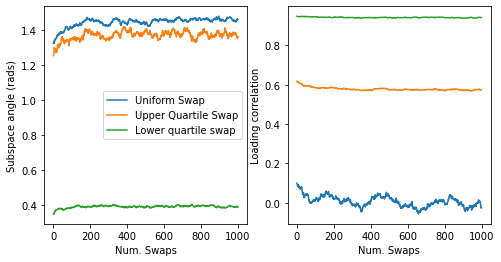

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(np.mean(ss_angles1, axis=0))
ax[0].plot(np.mean(ss_angles2, axis=0))
ax[0].plot(np.mean(ss_angles3, axis=0))

ax[1].plot(np.mean(lc1, axis=0))
ax[1].plot(np.mean(lc2, axis=0))
ax[1].plot(np.mean(lc3, axis=0))

ax[0].legend(['Uniform Swap', 'Upper Quartile Swap', 'Lower quartile swap'])

ax[0].set_ylabel('Subspace angle (rads)')
ax[1].set_ylabel('Loading correlation')
ax[0].set_xlabel('Num. Swaps')
ax[1].set_xlabel('Num. Swaps')

In [ ]:
plt.plot()